# This is a demo on how to use the HET Pupil tool
This tool is to obtain the effective apperture of HET as a function of time during an observation block.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from pyHETobs import ObservationBlock
from astropy.time import Time, TimeDelta

In [2]:
# Creat an Observation block for TRAPPIST-1  aka. '2MASS J23062928-0502285'

TRAPPObservation = ObservationBlock('2MASS J23062928-0502285',east_track=True,otime=Time('2018-11-24T02:31:33'))

Identified Star coordinates as <SkyCoord (ICRS): (ra, dec) in deg
    (346.62236836, -5.04139769)>
2MASS J23062928-0502285 will cross zenith at 2018-11-24T01:51:31.879
Calculating optimal Azimuth and transit time..
Optimal Azimuth to park telescope is at: 179.9583768716703 deg
Star will transit the East track window at 2018-11-24T01:51:31.879


Duration of Track length = 4023.512456104133 seconds
Track starts from -2011.6646910055526 seconds to 2011.8477650985803 seconds, with transit at 0 sec.
Initialising HET Primary Mirror and Pupil..
Area of one Hex Segment mirror of primary = 0.8660254037844387 m^2
No of Segments in Primary Mirror = 91
Area of Primary Mirror = 78.8083117443839 m^2


In [3]:
# Plot the telescope aperture during this track
t = np.linspace(-2000,2000,1000)
aperture_values =  TRAPPObservation.EffectiveHETapperture(t)


<IPython.core.display.Javascript object>


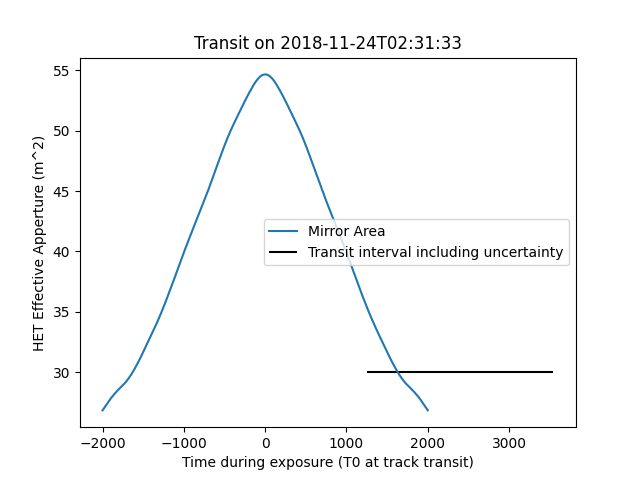

In [5]:
plt.plot(t,aperture_values,label='Mirror Area')
starttime = (Time('2018-11-24T02:12:29')-TRAPPObservation.Transit_time)
endtime = (Time('2018-11-24T02:50:37')-TRAPPObservation.Transit_time)
plt.hlines(30,xmin=starttime.sec,xmax=endtime.sec,color='k',label='Transit interval including uncertainty')
plt.ylabel('HET Effective Apperture (m^2)')
plt.xlabel('Time during exposure (T0 at track transit)')
plt.title('Transit on 2018-11-24T02:31:33')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


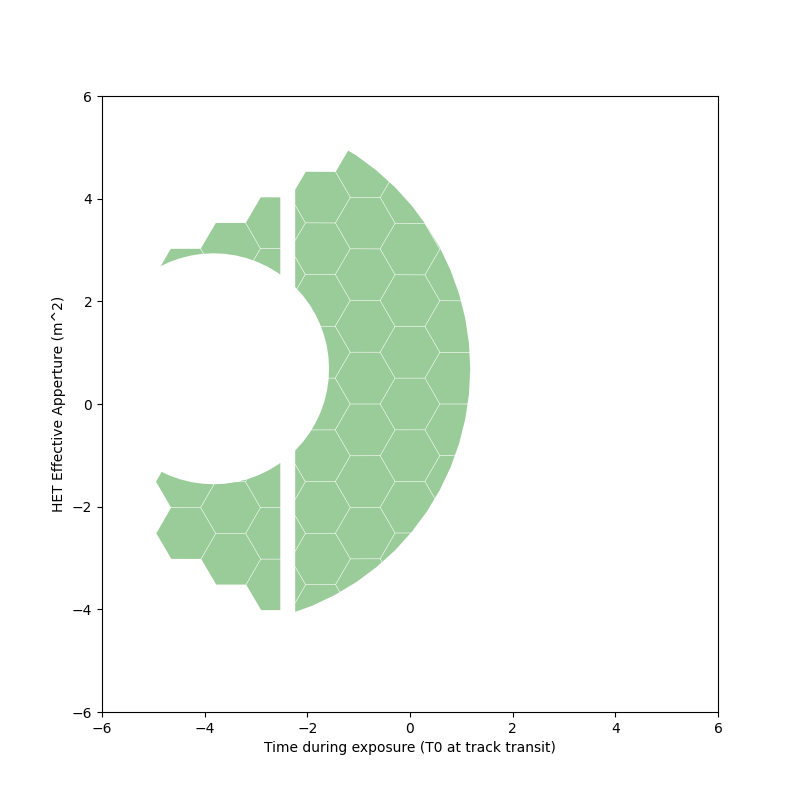

<AxesSubplot:>

In [6]:
# Plot of the Pupil at the beginning of the exposure
TRAPPObservation.plot_effectiveHETapperture(-2000.)

### Another source which transit through the center

In [7]:
V2494Observation = ObservationBlock('V2494 Cyg')

Identified Star coordinates as <SkyCoord (ICRS): (ra, dec) in deg
    (314.58789199, 52.49103071)>
V2494 Cyg will cross zenith at 2021-03-05 16:59:41.637897
Calculating optimal Azimuth and transit time..
Optimal Azimuth to park telescope is at: 40.303302174382075 deg
Star will transit the East track window at 2021-03-05 14:30:21.735656
Duration of Track length = 6625.842739385447 seconds
Track starts from -3314.195808410238 seconds to 3311.6469309752088 seconds, with transit at 0 sec.
Initialising HET Primary Mirror and Pupil..
Area of one Hex Segment mirror of primary = 0.8660254037844387 m^2
No of Segments in Primary Mirror = 91
Area of Primary Mirror = 78.8083117443839 m^2


In [8]:
# Plot the telescope aperture during this track
t = np.linspace(-3300,3300,2000)
aperture_values =  V2494Observation.EffectiveHETapperture(t)
plt.plot(t,aperture_values)
plt.ylabel('HET Effective Apperture (m^2)')
plt.xlabel('Time during exposure (T0 at track transit)')
plt.show()

<IPython.core.display.Javascript object>


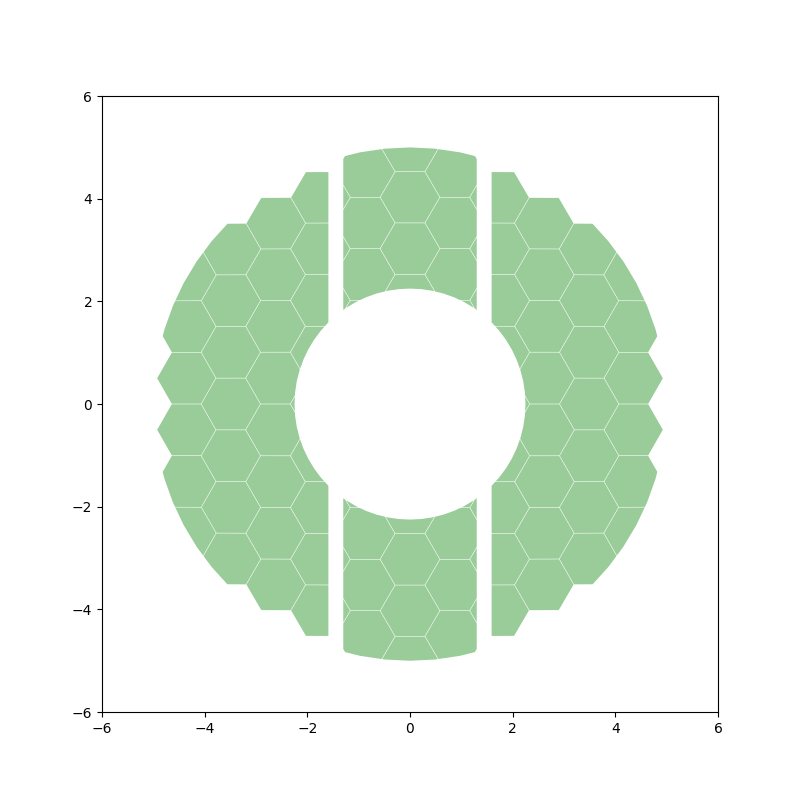

<AxesSubplot:>

In [9]:
# Image of the pupil during transit time.
V2494Observation.plot_effectiveHETapperture(0.,outputfile='HETPupilimageAtTransit.png')